#### 통계적 추정
- 점추정
  - 모평균이나 모분산 등의 모수를 하나의 수치로 추정
  - 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성이라고 하며 불편성을 가진 추정량의 불편추정량이라고 한다.
  - 표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 이 불편성이다.
  - 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해가는 성질을 일치성이라고 하며 일치성을 지닌 추정량을 일치 추정량이라고 함
  - 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 할 수 있다.
  - 모분산의 불편 추정량이 되는 표본통계량은 불편분산이다.
  - 불편분산은 표본분산에거 나누는 수 n-1로 하는 식으로 계산되며 표본분산은 $S^2$으로 나타내지만 불편분산은 $s^2$으로 나타낸다.
  
- 구간추정
  - 모분산을 알고 있는 경우의 모평균 구간추정
  - 모분산을 알고 있는 경우의 모분산 구간추정
  - 모분산을 알지 못하는 경우의 모평균 구간추정
  - 베르누이 분포의 모평균의 구간 추정
  - 포아송 분포의 모평균의 구간 추정

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df.score)
print('mean:', np.mean(scores),'var:', np.var(scores))

mean: 69.53 var: 206.6691


In [2]:
# 모평균과 모분산의 점추정 사례를 파이썬 코드로 수행
# 원소 20개로 구성된 표본을 총 1만개 생성 후 대수의 법칙을 활용하여 모평균과 모분산 추정
np.random.seed(20202)
n_samples = int(1e4)
n = 20
samples = np.random.choice(scores, (n_samples,n))
sample_means = np.mean(samples,axis = 1)
print('모평균 점추정 :',np.mean(sample_means),'\n')

sample_var = np.var(samples, axis = 1, ddof = 1)
print('모분산 점추정 :',np.mean(sample_var))

모평균 점추정 : 69.556695 

모분산 점추정 : 206.3315765789474


모분산을 모르는 경우
- $\sqrt{\sigma^2/n}$ 대신 불편표준편차의 $\sqrt{s^2/n}$를 표준오차로 사용한다.
- 표준화 과정에서 다음의 식이 사용되는데, 이것은 t분포를 따른다. (카이제곱분포 Y 이용하여 구함)  
$t = $ $Z \over \sqrt{Y/(n-1)}$
- 이 때, $\alpha$ 신뢰구간은 다음과 같다.  
$[\bar{X}-t_{\alpha/2}(n-1)\sqrt{s^2/n}, \bar{X}-t_{1-\alpha/2}(n-1)\sqrt{s^2/n}]$


In [3]:
# 모분산을 알지 못할 때 정규분포의 모평균의 구간 추정을 파이썬 코드로 수행

# 모분산 대신 추정량인 불편분산 s^2를 사용 > t 분포의 정의를 따름

sample_index = np.random.randint(n_samples)
sample = samples[sample_index]
s_mean = np.mean(sample)
s_var = np.var(sample, ddof = 1)
s_mean, s_var

rv = stats.t(df = n-1)
lcl = s_mean - rv.isf(0.025)*np.sqrt(s_var/n)
ucl = s_mean - rv.isf(0.975)*np.sqrt(s_var/n)
lcl,ucl

(67.21881404885121, 79.18118595114879)

In [4]:
# 모집단에 정규분포를 가정할 수 없는 예를 포아송 분포로 설정하여 모평균 신뢰구간을 구하세요

# 포아송 분포 : 평균 = 𝜆, 분산 = 𝜆

n_access_df = pd.read_csv('./data/ch10_access.csv')
n_access = np.array(n_access_df['access number'])
n = len(n_access)

s_mean = np.mean(n_access)
print(s_mean)

rv = stats.norm()

lcl = s_mean - rv.isf(0.025)*np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975)*np.sqrt(s_mean/n)
lcl,ucl

10.444444444444445


(9.697953549598202, 11.190935339290688)

#### 통계적 가설 검정

- 가설 검정은 모평균은 '130g보다 작다'이며 이는 차이가 있다고 주장하는 것이므로 대립 가설이 된다. 반대로 '모평균이 130g이다'는 귀무 가설이 된다.

- 모평균이 130이라는 가정,정규분포를 따르고 분산이 9라는 전제
- 표본평균은 N(130,9/14)를 따를 것

- 유의수준으로 5%의 확률을 설정했다.
- rv.isf(0.95)는 128.681이며 이 값이 임계값이 된다.
- 학생의 구매한 감자튀김의 표본평균은 128.451이며 이를 검정 통계량으로 선정된다.
- 임계값보다 검정통계량이 작으므로 귀무가설이 기각된다. 따라서 모평균이 130g 보다 작다는 결론을 내릴 수 있다.

In [69]:
# 귀무가설 : 감자튀김의 평균무게는 130g이다.
# 대립가설 : 감자튀김의 평균무게는 130g보다 작다.
# 유의 수준은 5%로 설정
df = pd.read_csv('./data/ch11_potato.csv')
sample = np.array(df.무게)
s_mean = sample.mean()
# 검정통계량 : A가 산 감자튀김 14개의 평균 무게 = 128.451g
print(s_mean,'\n')
# 임계값 구하기
rv = stats.norm(130, np.sqrt(9/14))
print(rv.isf(0.95),'\n')
# 검정통계량이 임계값보다 작기때문에 귀무가설은 기각된다.


# 표준화 하여 검정통계량과 임계값의 비교

# 표준화 된 검정 통계량 값
z = (s_mean-130)/np.sqrt(9/14)
print(z,'\n')
# 임계값
rv = stats.norm()
print(rv.isf(0.95) , '\n')
# 검정통계량이 임계값보다 작으므로 귀무가설은 기각

# p값을 활용하여 가설검정

print(rv.cdf(z))
# 유의수준인 0.05보다 작으므로 귀무가설 기각

# 따라서 모평균은 130g보다 작다.


128.4507142857143 

128.68118313069039 

-1.932298779026813 

-1.6448536269514722 

0.026661319523126635


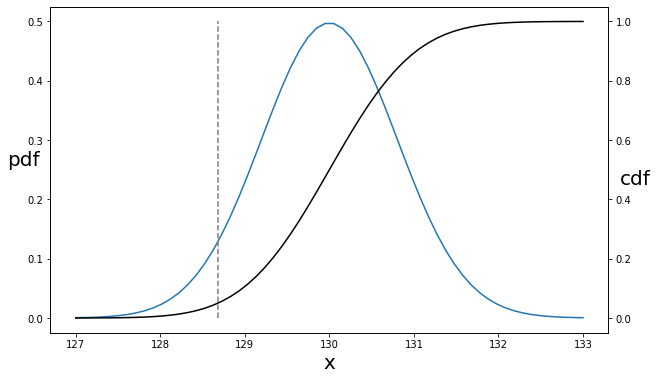

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
xs = np.linspace(127,133,60)
rv = stats.norm(130, np.sqrt(9/14))
ax1.plot(xs,rv.pdf(xs))
ax2.plot(xs,rv.cdf(xs),color = 'black')
ax1.vlines(rv.ppf(0.05),0,0.5,color = 'gray',ls='--')
ax1.set_xlabel('x',fontsize = 20)
ax1.set_ylabel('pdf',rotation = 0, fontsize = 20)
ax2.set_ylabel('cdf',rotation = 0,fontsize = 20)
plt.show()

In [5]:
df = pd.read_csv('./data/ch11_potato.csv')
df.head()

,무게
0,122.02
1,131.73
2,130.60
3,131.82
4,132.05


In [12]:
# 감자튀김 무게의 평균이 130g이다 라는 귀무가설에 대한 유의성 검정을 수행

s_mean = np.mean(np.array(df['무게']))
print(s_mean,'\n')

z = (s_mean - 130)/np.sqrt(9/14)
print('검정통계량:', z)

rv = stats.norm()
print('임계값',rv.isf(0.95))

# 검정통계량이 임계값보다 작으므로 귀무가설을 기각한다.

128.4507142857143 

검정통계량: -1.932298779026813
임계값 -1.6448536269514722


In [11]:
# p값이 유의수준 0.05보다 작으므로 귀무가설을 기각한다.
p_value = rv.cdf(z)
p_value
#'모평균은 130g이다'라는 결론이 되는 것은 아니다.

0.026661319523126635

In [9]:
# 양측검정
z = (s_mean-130)/np.sqrt(9/14)
z.round(4)


-1.9323

In [11]:
rv = stats.norm()
rv.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [13]:
# 양측 검정의 p값은 상단과 하단의 양쪽 면적을 고려해야 하므로 누적밀도함수의 2배로 한다.
# p값이 0.05보다 크므로 귀무가설은 기각되지 않는다. '감자튀김 무게 평균은 130g이 아니다' 라고 말할 수 없다.
rv.cdf(z)*2

0.05332263904625327

#### 가설검정에서의 두가지 오류
- 제 1종 오류 : 귀무가설이 옳을 때 귀무가설을 기각하는 오류
  - 실제로 평균이 130g인데도 평균은 130g 보다 작다라는 결론을 내리는 상황
  - 위험률 : $\alpha$
- 제 2종 오류 : 대립가설이 옳을 때 귀무가설을 채택하는 오류
  - 모평균은 130g 보다 작은데도 '모평균은 130g보다 작다' 라는 결론을 얻을 수 없는 비율
  - 검정력 : 1-$\beta$
- 통계적 가설검정에서는 제 1종 오류는 제어할 수 있지만 제 2종 오류는 제어할 수 없는 비대칭성이 있다.

In [16]:
# 제 1종 오류를 범할 비율 : 위험률 = 분석가가 제어할 수 있는 확률
c = stats.norm().isf(0.95)
rv = stats.norm(130,3)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14),2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z < c:
        cnt += 1
cnt / n_samples

0.0497

In [26]:
# 제 2종 오류를 범하는 비율
c = stats.norm().isf(0.95)
rv = stats.norm(128,3)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14),2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z >= c:
        cnt += 1
cnt / n_samples

0.1956

In [73]:
# 정규분포의 모평균에 대한 검정(모분산을 알고 있음)
# 모평균에 대한 검정을 사용자 함수 pmean_test()를 작성하여 감자튀김 사례에 대하여 양측검정으로 수행하세요
def pmean_test(sample, mean0, p_var,alpha = 0.05):
    s_mean = np.mean(sample)
    n = len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)
    
    z = (s_mean - mean0)/np.sqrt(p_var/n)
    if interval[0] <= z <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')
        
    if z< 0 :
        p = rv.cdf(z)*2
    else:
        p = (1-rv.cdf(z))*2
    print(f'p값은 {p:.3f}')
    
pmean_test(sample,130,9)

귀무가설을 채택
p값은 0.053


In [34]:
# 정규분포의 모분산에 대한 검정
def pvar_test(sample, var0, alpha = 0.05):
    u_var = np.var(sample,ddof = 1)
    n = len(sample)
    rv = stats.chi2(df = n-1)
    interval = rv.interval(1-alpha)
    
    y = (n-1)*u_var/var0   #검정통계량
    if interval[0] <= y <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')
        
    if y<rv.isf(0.5):
        p = rv.cdf(y)*2
    else:
        p = (1-rv.cdf(y))*2
    print(f'p값은 {p:.3f}')

In [35]:
pvar_test(sample, 9)

귀무가설을 채택
p값은 0.085


정규분포의 모평균에 대한 검정(모분산을 알지 못함)

In [36]:
def pmean_test(sample, mean0, alpha = 0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample,ddof = 1)
    
    n = len(sample)
    rv = stats.t(df=n-1)
    interval = rv.interval(1-alpha)
    
    t = (s_mean-mean0) / np.sqrt(u_var/n)
    
    if interval[0] <= t <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')
        
    if t< 0 :
        p = rv.cdf(t)*2
    else:
        p = (1-rv.cdf(t))*2
    print(f'p값은 {p:.3f}')

In [37]:
pmean_test(sample,130)

귀무가설을 채택
p값은 0.169


대응표본, 독립표본에 대하여 정규분포를 가정하는 경우, 가정할 수 없는 경우의 4가지 유형의 사례 작성

In [38]:
data = pd.read_csv('./data/ch11_training_rel.csv')
print(data.shape)
data.head()

(20, 2)


,전,후
0,59,41
1,52,63
2,55,68
3,61,59
4,59,84


In [39]:
# 귀무가설:after의 평균 - before의 평균 = 0
# 대립가설:after의 평균 - before의 평균 != 0

data['gap'] = data['후'] - data['전']
data.head()

,전,후,gap
0,59,41,-18
1,52,63,11
2,55,68,13
3,61,59,-2
4,59,84,25


In [41]:
t,p = stats.ttest_1samp(data.gap, 0)
p
#유의값보다 작으므로 귀무가설을 기각, 근련운동은 집중력에 유의미한 차이를 가져온다라고 할 수 있다.

0.04004419061842953

In [42]:
# 독립표본 t검정
data = pd.read_csv('./data/ch11_training_ind.csv')
data.head()

,A,B
0,47,49
1,50,52
2,37,54
3,60,48
4,39,51


In [43]:
t,p = stats.ttest_ind(data.A,data.B, equal_var = False)
p
#p값이 0.05보다 크므로 귀무가설 채택, 두 학급 사이에 평균 점수에 유의한 차이가 있다고 말할 수 없다.

0.08695731107259362

In [45]:
# 정규분포를 가정할 수 없는 경우 대응표본에 대한 가설검정
data = pd.read_csv('./data/ch11_training_rel.csv')
data1 = data[:6].copy()
data1['gap'] = data1['후'] - data1['전']
data1.head()

,전,후,gap
0,59,41,-18
1,52,63,11
2,55,68,13
3,61,59,-2
4,59,84,25


In [47]:
# 윌콕슨의 부호순위검정

t,p = stats.wilcoxon(data1['전'],data1['후'])
p

0.6875

독립성 검정이 필요한 사례 2가지 작성

In [58]:
df = pd.read_csv('./data/ch11_ad.csv')
print(len(df))
df.head()

1000


,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다


In [59]:
# 기대도수와 관측도수의 차이를 측정해서 검정 수행
ad_cross = pd.crosstab(df.광고, df.구입)
ad_cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [52]:
chi2, p, dof, ef = stats.chi2_contingency(ad_cross,correction = False)
chi2, p, dof
#p값이 0.05보다 크므로 귀무가설을 채택, 각 광고를 통한 구입에 유의미한 차이가 인정되지 않는다고 결론을 내릴 수 있다.

(3.75, 0.052807511416113395, 1)

In [67]:
# 기대도수(확률적인 기대)와 관측도수(실측)의 차이를 측정해서 검정 수행

# 각 항목 (구매 여부, 광고 종류)별로 합산을 구함
n = len(df)
n_not, n_yes = ad_cross.sum()
n_adA, n_adB = ad_cross.sum(axis = 1)

print(n_not, n_yes, n_adA, n_adB)

# 각 합산에 따른 기대 도수를 구함

ad_ef = pd.DataFrame({'했다': [n_adA * n_yes / n,n_adB*n_yes/n],'하지 않았다':[n_adA*n_not/n,n_adB*n_not/n]},index=['A','B'])
display(ad_ef)

# 기대도수와 관측도수의 차이를 구함

y = ((ad_cross - ad_ef)**2/ad_ef).sum().sum()
print(y)

# y는 자유도가 1인 카이제곱분포를 근사적으로 따른다고 한다.
# 카이제곱분포를 이용해 p값을 계산
rv = stats.chi2(1)
print((1-rv.cdf(y)).round(4))

# 이 방법 역시 검정통계량이 유의값보다 크므로, 귀무가설을 채택, 각 광고로 인한 구입에 유의미한 차이다 있다고 말할 수 없다. 

900 100 400 600


,했다,하지 않았다
A,40.0,360.0
B,60.0,540.0


3.75
0.0528
